In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy as sp

import portfolio_functions as pf
from pandas_datareader import data, wb
import GARCH_MPL as gml

%pylab inline
%matplotlib inline

no talib
Populating the interactive namespace from numpy and matplotlib


# GARCH

In [35]:
# Simulate GARCH
pars = [0.03123, 0.06123, 0.90123]
sz = 300

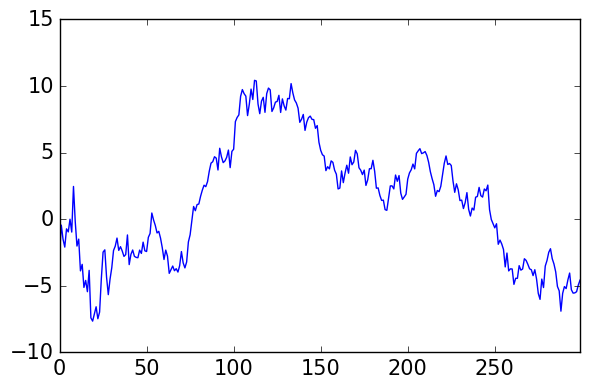

In [43]:
sdata = gml.simulate_2(pars, sz)
sdata.cumsum().plot()
plt.tight_layout()

In [45]:
# ESTIMATE GARCH
gml.estimate_garch(sdata, gml.GARCH_PP, update_freq=5, disp='off')

(array([ 0.02584369,  0.06607634,  0.89215926]), 368.76090340327926)

In [70]:
# ESTIMATE USING POWERFUL ESTIMATORS
gml = reload(gml)
%time LPM, LPS, LMM, LMS, QMM, QMS = gml.monte_carlo_modprof(pars, 200, 2, omega=True)

4
4
CPU times: user 28.5 s, sys: 413 ms, total: 28.9 s
Wall time: 3min 47s


In [71]:
print(LPM)
print('---')
print(LMM)
print('---')
print(QMM)

        omega     gamma      beta
200  0.083684  0.091239  0.811964
---
        omega     gamma      beta
200  0.068947  0.099143  0.820363
---
        omega     gamma      beta
200  0.083869  0.096635  0.809471


# True Functions

In [ ]:
PARS = np.array([0.03, 0.06, 0.9])
length_data = 600
N = 2

gml = reload(gml)
%time PM1, PM2, PM3, LLM1, LLM2, LLM3 = gml.monte_carlo_hierarchy(PARS, length_data, N)

In [ ]:
PM1

In [ ]:
PM2

In [ ]:
PM3

In [ ]:
# Estimate mod and prof beta
lp1, lm1, phat1, phat2 = gml.estimate_profile_and_modified_lik_beta(sdata)

In [ ]:
# test2 
gml.monte_carlo_modprof(pars, 100, 2, omega=True)

In [ ]:
gml.monte_carlo_modprof(pars, 100, 2, omega=False)

In [ ]:
gml = reload(gml)
qmlHat, mplOHat, mplGHat, mplBHat = gml.get_all_estimators(sdata)